In [1]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt
from scipy.stats import chisquare
pd.set_option('max_colwidth', 400)

In [2]:
#creating new csv for Mai's research question
new_wp_mentalhealth_df = pd.read_csv("Resources/cleaned_workplace_mental_health.csv")

#drop unneeded columns

mai_df = new_wp_mentalhealth_df.drop(['Timestamp', 'Country', '# of Employees', 'Help Resources',
                                     'Mental Health Consequence', 'Physical Health Consequence',
                                     'Mental Health Interview', 'Physical Health Interview',
                                     'Mental v. Physical','Unnamed: 0'],axis=1)
mai_df.to_csv('Resources/FamilyHis_vs_SeekingHelp.csv')

In [3]:
#creating new csv for mai's research question
#do individual with history of mental illness in the family more likely to reachout for help?

mai_df.head()


,Age,Gender,Family History,Seeks Treatment,Have Benefits,Care Options,Wellness Programs,Anonymity
0,37.0,Female,No,Yes,Yes,Not sure,No,Yes
1,44.0,Male,No,No,Don't know,No,Don't know,Don't know
2,32.0,Male,No,No,No,No,No,Don't know
3,31.0,Male,Yes,Yes,No,Yes,No,No
4,31.0,Male,No,No,Yes,No,Don't know,Don't know


/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


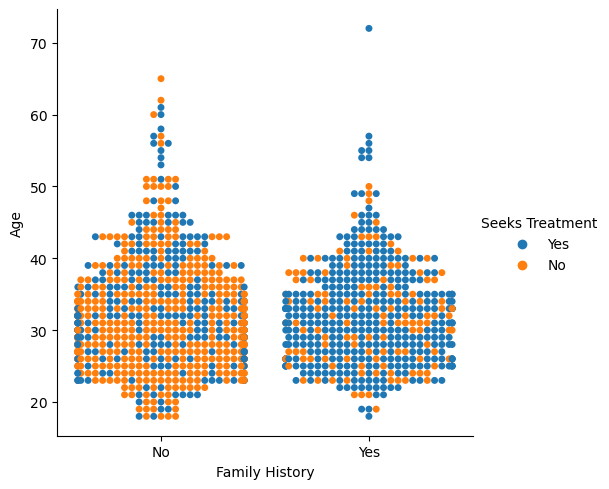

In [4]:
#scatter plot familyhis vs seaking treament

sns.catplot(data=mai_df, x="Family History", y=("Age"), hue = "Seeks Treatment" , kind ="swarm")
plt.savefig('Resources/familyhis_vs_seekinghelp.png', bbox_inches = 'tight')

Seeks Treatment   No  Yes
Family History           
No               495  272
Yes              127  365


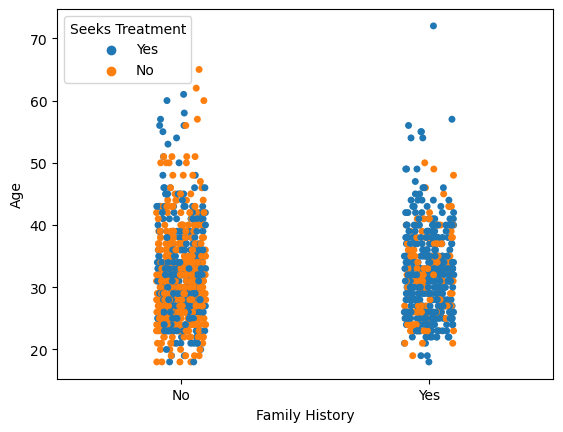

In [5]:
sns.stripplot(data=mai_df, x="Family History", y=("Age"), hue = "Seeks Treatment")

mai_df1 = mai_df[["Family History", "Seeks Treatment"]]
table = sm.stats.Table.from_data(mai_df1)
print(table.table_orig)
plt.savefig('Resources/familyhis_vs_seekinghelp2.png', bbox_inches = 'tight')

In [6]:
print(chisquare(table.table_orig, axis=None))

Power_divergenceResult(statistic=229.04765687053214, pvalue=2.2218773233065723e-49)


In [7]:
#sns.stripplot(data=mai_df, x="Gender", y="Anonymity", hue = "Seeks Treatment")


-------------------
Seeks Treatment   No  Yes
Gender                   
Female            77  171
Male             541  446
Other              4   20
-------------------
 
df          2
pvalue      9.96647209206003e-13
statistic   55.26870128808481


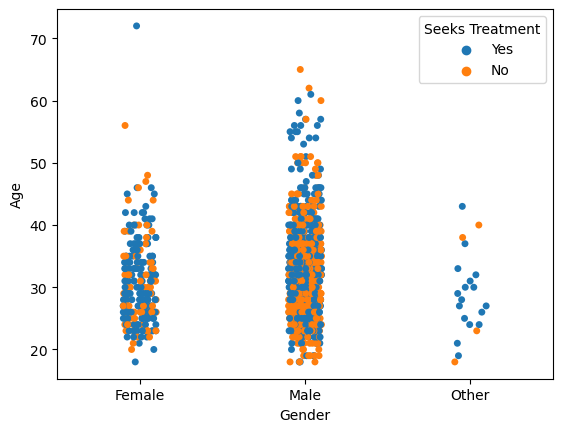

In [8]:
#sns.catplot(data=mai_df, x="Gender", y=("Age"), hue = "Seeks Treatment" , kind ="swarm")
sns.stripplot(data=mai_df, x="Gender", y=("Age"), hue = "Seeks Treatment")

print("-------------------")


mai_df2 = mai_df[["Gender", "Seeks Treatment"]]
table2 = sm.stats.Table.from_data(mai_df2)
res2 =  table2.test_nominal_association()
print(table2.table_orig)
print("-------------------")
print(" ")
print (res2)
plt.savefig('Resources/gender_vs_seekinghelp.png', bbox_inches = 'tight')

In [9]:
mai_df1male = mai_df.loc[mai_df['Gender'] == 'Male']
mai_df1female = mai_df.loc[mai_df['Gender'] == 'Female']
hue_orders = ['Yes', 'No']

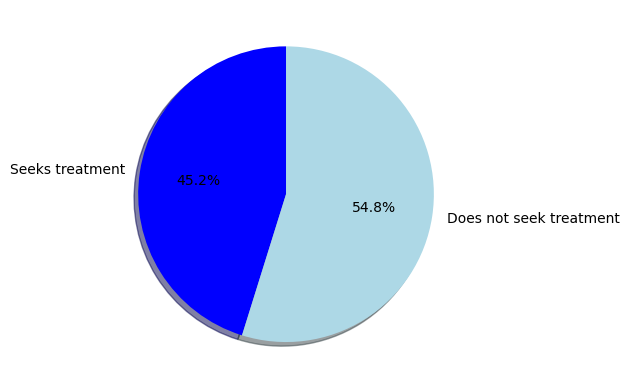

In [22]:
mai_df2male = [446,541]
mylabels  = ['Seeks treatment', "Does not seek treatment"]
mcolors = ['blue', 'lightblue']
plt.pie(mai_df2male, labels = mylabels, colors = mcolors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.savefig('Resources/gender_vs_seekinghelpmale.png',bbox_inches = 'tight')


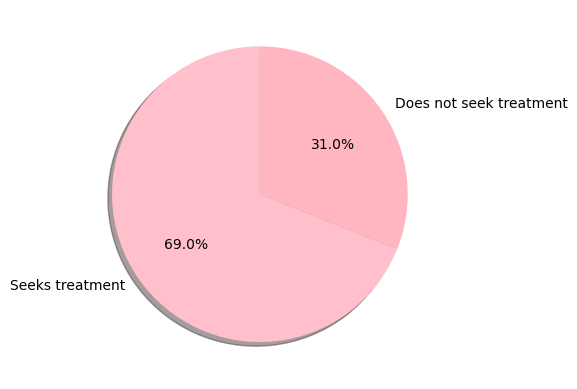

In [21]:
mai_df2female = [171,77]
mylabelsfe  = ['Seeks treatment', "Does not seek treatment"]
fcolors = ['pink', 'lightpink']
plt.pie(mai_df2female, labels = mylabels, colors = fcolors , autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.savefig('Resources/gender_vs_seekinghelpfemale.png',bbox_inches = 'tight')

In [12]:
mai_df3 = mai_df[["Seeks Treatment", "Anonymity"]]
table3 = sm.stats.Table.from_data(mai_df3)
print(table3.table_orig)

Anonymity        Don't know  No  Yes
Seeks Treatment                     
No                      448  27  147
Yes                     371  38  228


In [13]:
res3 =  table3.test_nominal_association()
print(table3.table_orig)
print("-------------------")
print (res3)

Anonymity        Don't know  No  Yes
Seeks Treatment                     
No                      448  27  147
Yes                     371  38  228
-------------------
df          2
pvalue      1.8304549906922318e-06
statistic   26.42189198645524


-------------------
Anonymity       Don't know  No  Yes
Family History                     
No                     520  33  214
Yes                    299  32  161
-------------------
df          2
pvalue      0.024381708706719074
statistic   7.427844141946347


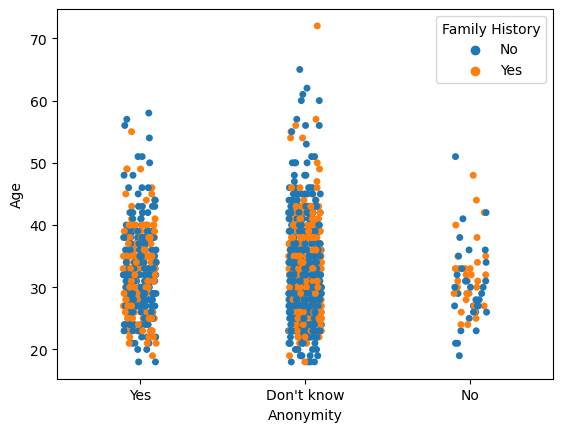

In [14]:
sns.stripplot(data=mai_df, x="Anonymity", y=("Age"), hue = "Family History")

print("-------------------")


mai_df4 = mai_df[["Family History", "Anonymity"]]
table4 = sm.stats.Table.from_data(mai_df4)
res4 =  table4.test_nominal_association()
print(table4.table_orig)
print("-------------------")
print (res4)
plt.savefig('Resources/familyhis_vs_anon.png', bbox_inches = 'tight')

In [15]:
mai_df1a = mai_df.loc[mai_df['Have Benefits'] == 'Yes']

Seeks Treatment   No  Yes
Family History           
No               125  121
Yes               47  184


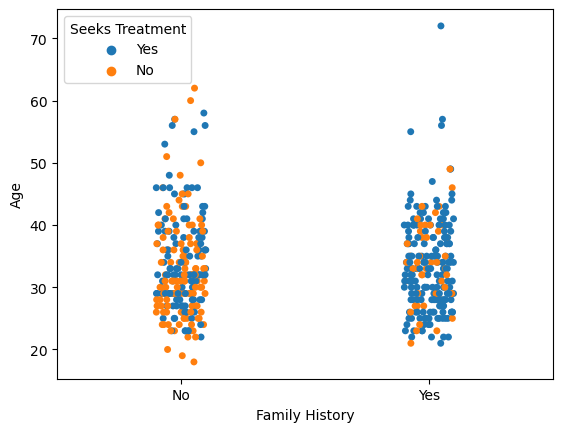

In [16]:
sns.stripplot(data=mai_df1a, x="Family History", y=("Age"), hue = "Seeks Treatment")

mai_df1b = mai_df1a[["Family History", "Seeks Treatment"]]
tablea = sm.stats.Table.from_data(mai_df1b)
print(tablea.table_orig)
plt.savefig('Resources/familyhis_vs_seekinghelpa.png', bbox_inches = 'tight')

In [17]:
print(chisquare(tablea.table_orig, axis=None))

Power_divergenceResult(statistic=79.23480083857443, pvalue=4.478788800512914e-17)


In [18]:
mai_df1c = mai_df.loc[mai_df['Have Benefits'] == 'No']
hue_orders = ['Yes', 'No']

Seeks Treatment   No  Yes
Family History           
No               160   91
Yes               33   90


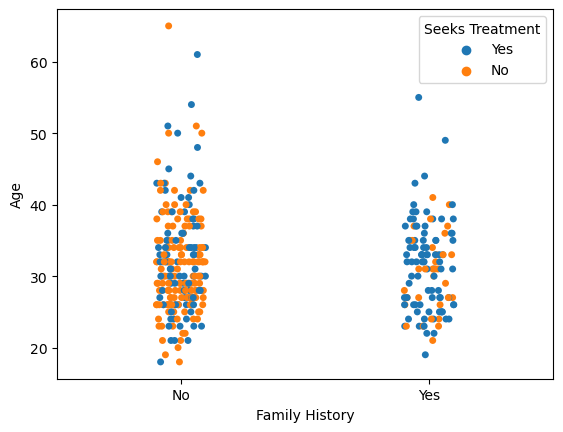

In [19]:
sns.stripplot(data=mai_df1c, x="Family History", y=("Age"), hue = "Seeks Treatment" , hue_order = hue_orders)

mai_df1d = mai_df1c[["Family History", "Seeks Treatment"]]
tableb = sm.stats.Table.from_data(mai_df1d)
print(tableb.table_orig)
plt.savefig('Resources/familyhis_vs_seekinghelpb.png', bbox_inches = 'tight')

In [20]:
print(chisquare(tableb.table_orig, axis=None))

Power_divergenceResult(statistic=86.64171122994651, pvalue=1.1527192136036096e-18)
